## Laptop Review Analysis

**1.Scraping the data from Amazon using BeautifulSoup**

In [19]:
#Importing the necessary libraries

import pandas as pd
import numpy as np
import re
import time
from datetime import datetime
from urllib.request import urlopen
from bs4 import BeautifulSoup
import requests



**2. Getting the data from Amazon** 

In [20]:
no_pages = 2

#function to get the neccesary data of the laptops
def get_data(pageNo):  
    headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:66.0) Gecko/20100101 Firefox/66.0", "Accept-Encoding":"gzip, deflate", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"}

    r = requests.get('https://www.amazon.in/gp/bestsellers/computers/1375424031/ref=zg_bs_pg_'+str(pageNo)+'?ie=UTF8&pg='+str(pageNo), headers=headers)#, proxies=proxies)
    content = r.content
    soup = BeautifulSoup(content)
    #print(soup)

    alls = []
    for d in soup.findAll('div', attrs={'class':'a-section a-spacing-none aok-relative'}):
        #print(d)
        name = d.find('span', attrs={'class':'zg-text-center-align'})
        n = name.find_all('img', alt=True)
        rating = d.find('span', attrs={'class':'a-icon-alt'})
        users_rated = d.find('a', attrs={'class':'a-size-small a-link-normal'})
        price = d.find('span', attrs={'class':'p13n-sc-price'})

        all1=[]

        if name is not None:
            #print(n[0]['alt'])
            all1.append(n[0]['alt'])
        else:
            all1.append("unknown-product")

        if rating is not None:
            #print(rating.text)
            all1.append(rating.text)
        else:
            all1.append('-1')

        if users_rated is not None:
            #print(price.text)
            all1.append(users_rated.text)
        else:
            all1.append('0')     

        if price is not None:
            #print(price.text)
            all1.append(price.text)
        else:
            all1.append('0')
        alls.append(all1)    
    return alls

**3.Converting the data into a csv file**

In [21]:
#the results list is created with column names
results = []
#iterating the get_data function starting from 1 till no_pages+1
for i in range(1, no_pages+1):
    results.append(get_data(i))
#the results list is a nested list. Therefore the list is flattened.
flatten = lambda l: [item for sublist in l for item in sublist]
#
df = pd.DataFrame(flatten(results),columns=['Laptop Name','Rating','Customers_Rated', 'Price'])
df.to_csv('amazon_products.csv', index=False, encoding='utf-8')

In [22]:
#reading the csv file
df = pd.read_csv("amazon_products.csv")
#the shape function gives the no.of rows and columns of the dataframe.
df.shape

(100, 4)

In [23]:
#head function is used to view the data
df.head(61)

,Laptop Name,Rating,Customers_Rated,Price
0,"HP 15 11th Gen Intel Core i3 Processor 15.6"" (...",3.9 out of 5 stars,90,"₹41,490.00"
1,"HP 15 (2021) Thin & Light Ryzen 3-3250 Laptop,...",4.1 out of 5 stars,"1,014","₹42,990.00"
2,"HP 15 (2021) Thin & Light Ryzen 3-3250 Laptop,...",3.8 out of 5 stars,"1,128","₹36,490.00"
3,"HP 15 Thin & Light Ryzen 3-3250 Laptop, 4 GB R...",3.3 out of 5 stars,422,"₹31,990.00"
4,"HP 15 AMD Athlon 15.6"" (39.62cms) HD Laptop (S...",3.5 out of 5 stars,272,"₹29,592.00"
...,...,...,...,...
56,ASUS VivoBook 14 (2020) Intel Core i5-1035G1 1...,3.9 out of 5 stars,331,"₹45,990.00"
57,"HP Pavilion (2021) 11th Gen Core i5 Laptop, 16...",4.4 out of 5 stars,176,"₹73,250.00"
58,Victus by HP Ryzen 5 5600H 16.1-inch(40.9 cm) ...,4.7 out of 5 stars,10,"₹67,990.00"
59,Lenovo IdeaPad Slim 3 2021 Intel Core i5 11th ...,4.6 out of 5 stars,8,"₹59,990.00"


**4.Data Tranformation
By converting the Price and Rating columns of the product file into integers**

In [24]:
#Since the ratings are out of 5, the rating is kept and the extra part is removed.
#From the customers_rated column, the comma is removed.
#From the price column, the rupee symbol and the comma are removed and split by dot
#Finally, all the three columns are converted to integer or float.
df['Rating'] = df['Rating'].apply(lambda x: x.split()[0])
df['Rating'] = pd.to_numeric(df['Rating'])
df["Price"] = df["Price"].str.replace('₹', '')
df["Price"] = df["Price"].str.replace(',', '')
df['Price'] = df['Price'].apply(lambda x: x.split('.')[0])
df['Price'] = df['Price'].astype(int)
df["Customers_Rated"] = df["Customers_Rated"].str.replace(',', '')
df['Customers_Rated'] = pd.to_numeric(df['Customers_Rated'], errors='ignore')
df.head()

,Laptop Name,Rating,Customers_Rated,Price
0,"HP 15 11th Gen Intel Core i3 Processor 15.6"" (...",3.9,90,41490
1,"HP 15 (2021) Thin & Light Ryzen 3-3250 Laptop,...",4.1,1014,42990
2,"HP 15 (2021) Thin & Light Ryzen 3-3250 Laptop,...",3.8,1128,36490
3,"HP 15 Thin & Light Ryzen 3-3250 Laptop, 4 GB R...",3.3,422,31990
4,"HP 15 AMD Athlon 15.6"" (39.62cms) HD Laptop (S...",3.5,272,29592


In [25]:
#The dtypes function displays the datatypes of the columns of the dataframe.
df.dtypes


Laptop Name         object
Rating             float64
Customers_Rated      int64
Price                int32
dtype: object

**5. Data Cleaning
Removing the missing values

In [26]:
#Replacing the zero values in the dataframe to NaN 
df.replace(str(0), np.nan, inplace=True)
df.replace(0, np.nan, inplace=True)
#Countin the no.of NaN in each column of the dataframe
count_nan = len(df) - df.count()
count_nan

Laptop Name        0
Rating             0
Customers_Rated    0
Price              5
dtype: int64

In [27]:
#The dropna() function drops all NaN rows in the dataframe
df = df.dropna()

**6. Sorting the cleaned data**

In [28]:
# The data is sorted in descending order on the basis of Price and Ratings
data = df.sort_values(["Price","Rating"], axis=0, ascending=False)[:15]
data

,Laptop Name,Rating,Customers_Rated,Price
77,"2020 Apple MacBook Pro (13.3-inch/33.78 cm, Ap...",4.7,672,130990.0
37,"2020 Apple MacBook Pro (13.3-inch/33.78 cm, Ap...",4.7,672,112900.0
50,"2020 Apple MacBook Pro (13.3-inch/33.78 cm, Ap...",4.7,672,112900.0
24,Victus by HP Ryzen 7 5800H 16.1-inch(40.9 cm) ...,4.4,9,109990.0
27,Victus by HP Ryzen 7 5800H 16.1-inch(40.9 cm) ...,4.4,16,90990.0
51,"2020 Apple MacBook Air (13.3-inch/33.78 cm, Ap...",4.7,629,88490.0
16,HP Pavilion (2021) Thin & Light 11th Gen Core ...,4.3,258,84990.0
84,"MSI GF65 Thin, Intel i7-10750H, 15.6"" FHD (39....",3.8,24,81990.0
90,"ASUS TUF Gaming F15 (2020), 15.6-inch (39.62 c...",3.9,7,80990.0
98,"MSI GF75 Thin, Intel i7-10750H, 17.3"" (43.9 cm...",4.6,6,74990.0


**7. Analysing the Sorted Data**

In [29]:
#Analysing the data for Top customer rated Laptop names
data = df[df['Customers_Rated'] > 1000]
data = data.sort_values(['Rating'],axis=0, ascending=False)[:10]
data

,Laptop Name,Rating,Customers_Rated,Price
14,Mi Notebook Horizon Edition 14 Intel Core i7-1...,4.4,1025,59490.0
36,Mi Notebook Horizon Edition 14 Intel Core i5-1...,4.4,1025,54999.0
67,HP 14 (2021) Thin & Light 11th Gen Core i3 Lap...,4.3,1751,40989.0
35,HP 15 (2021) Thin & Light 11th Gen Core i5 Lap...,4.2,1238,63990.0
1,"HP 15 (2021) Thin & Light Ryzen 3-3250 Laptop,...",4.1,1014,42990.0
79,"AVITA Essential NE14A2INC433-CR 14"" (35.56cms)...",3.9,1026,18990.0
2,"HP 15 (2021) Thin & Light Ryzen 3-3250 Laptop,...",3.8,1128,36490.0


**8. Plotting the data**

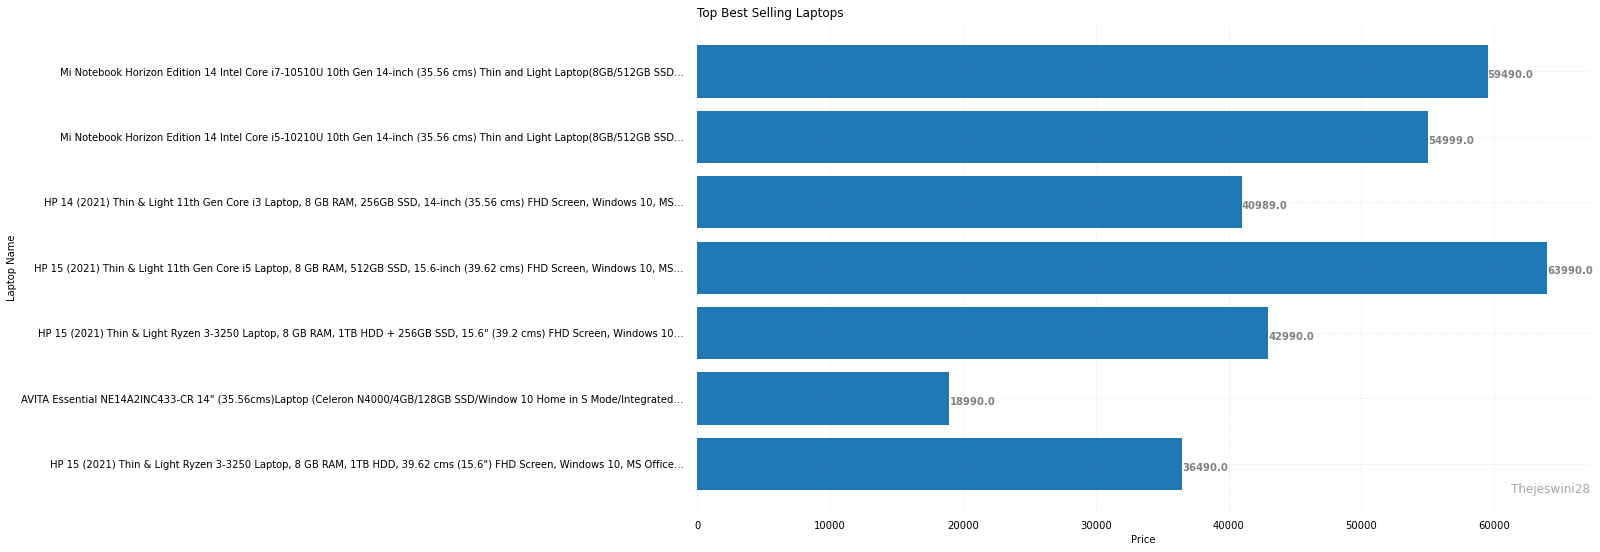

In [34]:
name = data['Laptop Name']
price = data['Price']
fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
ax.barh(name, price)
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
    
 # Add Plot Title
ax.set_title('Top Best Selling Laptops',
             loc ='left', )
plt.ylabel('Laptop Name')
plt.xlabel('Price')
 
# Add Text watermark
fig.text(0.9, 0.15, 'Thejeswini28', fontsize = 12,
         color ='grey', ha ='right', va ='bottom',
         alpha = 0.7)
 
# Show Plot
plt.show()

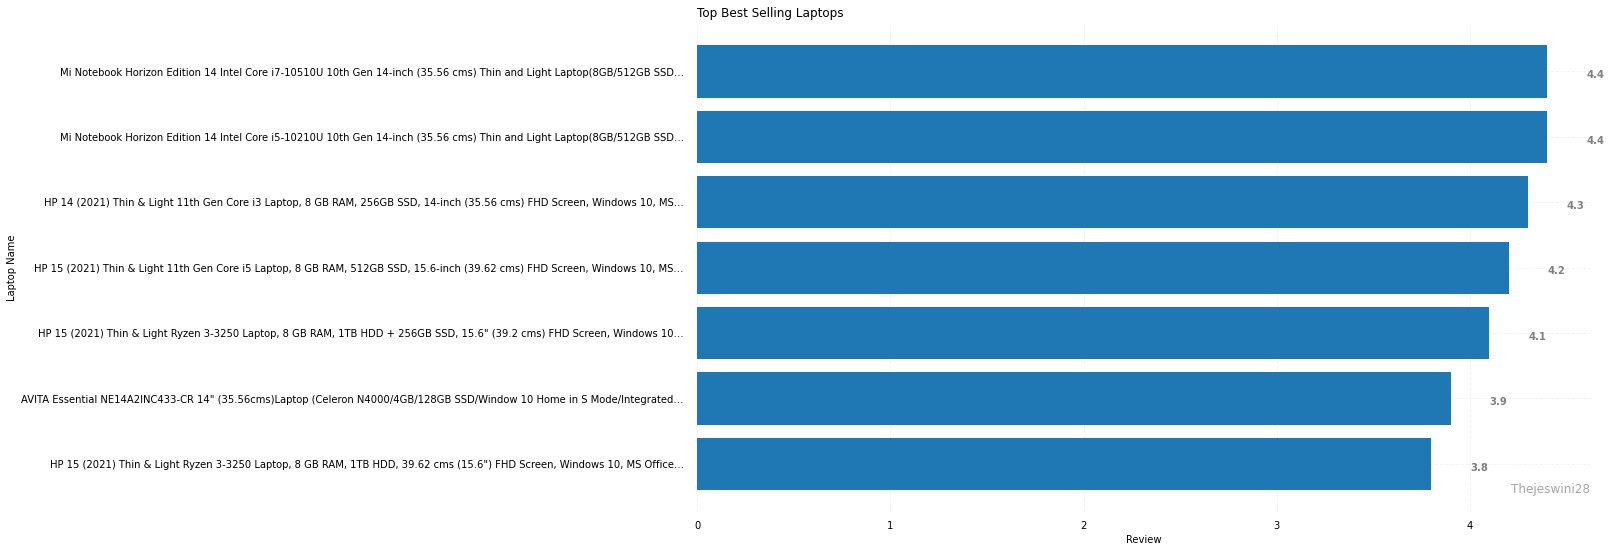

In [35]:

name = data['Laptop Name']
price = data['Rating']
fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
ax.barh(name, price)
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)
    
# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)
 
# Add x, y gridlines
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
# Show top values
ax.invert_yaxis()
 
# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize = 10, fontweight ='bold',
             color ='grey')
    
 # Add Plot Title
ax.set_title('Top Best Selling Laptops',
             loc ='left', )
plt.ylabel('Laptop Name')
plt.xlabel('Review')
 
# Add Text watermark
fig.text(0.9, 0.15, 'Thejeswini28', fontsize = 12,
         color ='grey', ha ='right', va ='bottom',
         alpha = 0.7)
 
# Show Plot
plt.show()


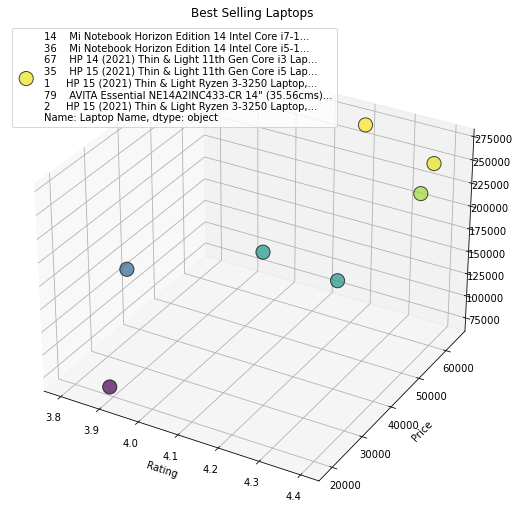

In [32]:
#3d scatter plot
x = data['Rating']
y = data['Price']
z = x*y

fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z,
           linewidths=1, alpha=.7,
           edgecolor='k',
           s = 200,label=data['Laptop Name'],
           c=z)
ax.legend()
plt.title('Best Selling Laptops')
plt.xlabel('Rating')
plt.ylabel('Price')
plt.show()

**From the above analysis, ** 
1. we can conclude that **HP Laptops** and **Mi Noteboks** are the most sought after laptops by users and are highly rated
2. While the **Mi Notebooks** had great reviews, they are slighlty on the expensive side.
3. Among the HP Laptops, specifically the **HP 14 (2021) Thin & Light 11th Gen Core i3 Laptop** has comparitively more customer rated reviews and is also on the affordable side.